# SAES for Multiobjective Optimization algorithms Benchmarking

This notebook provides an example of how to use the SAES library. As case study, we will use the data of the paper "[On the automatic design of multi-objective particle swarm optimizers: experimentation and analysis](https://doi.org/10.1007/s11721-023-00227-2)", published in Swarm Intelligence in 2023. In this paper, a comparative study of multi-objective particle swarm optimizers (MOPSO) is conducted, where four of MOPSO variants are compared with algorithms NSGAII, SMPSO and OMOPSO. The computed metrics for performace assessment are six multi-objective quality indicators: EP (additive epsilon), GD (generational distance), SP (spacing), HV (hypervolume), NHV (normalized hypervolume), IGD (inverted generational distance) and IGD+ (inverted generational distance plus). All theses metrics are intended to be minimized but the HV.  

To use SAES, two files CSV files with the following contents are required:
- Metric names and whether they have to be maximized or not
- Experiment data: algorithm, instance, MetricName, executionID, and MetricValue

We use the files called `metrics.csv` and `swarmIntelligence.csv` in this example, and we will use them to illustrate the main features of SAES: boxplot, LaTeX tables and critical distance graph generation.

## Load the Data

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import pandas as pd

from SAES.plots.boxplot import boxplot_all_problems
from SAES.plots.boxplot import boxplot_instance_metric
from SAES.plots.critical_distance_plot import CDplot_metric
from SAES.latex_generation.latex_skeleton import create_latex_selected

In [2]:
# Load the experiment data
experimentData = pd.read_csv('swarmIntelligence.csv')
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,2.082913e-02
1,NSGAII,ZDT1,EP,1,2.141113e-02
2,NSGAII,ZDT1,EP,2,2.063581e-02
3,NSGAII,ZDT1,EP,3,2.334370e-02
4,NSGAII,ZDT1,EP,4,2.589423e-02
...,...,...,...,...,...
31845,AutoMOPSOZ,RE25,IGD+,20,3.565453e-08
31846,AutoMOPSOZ,RE25,IGD+,21,7.454758e-08
31847,AutoMOPSOZ,RE25,IGD+,22,1.243545e-07
31848,AutoMOPSOZ,RE25,IGD+,23,3.372467e-08


In [3]:
# Compared algoritms
algorithms = experimentData.Algorithm
list(algorithms.unique())

['NSGAII',
 'SMPSO',
 'OMOPSO',
 'AutoMOPSOD',
 'AutoMOPSOW',
 'AutoMOPSORE',
 'AutoMOPSOZ']

In [4]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31850 entries, 0 to 31849
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Algorithm    31850 non-null  object 
 1   Instance     31850 non-null  object 
 2   MetricName   31850 non-null  object 
 3   ExecutionId  31850 non-null  int64  
 4   MetricValue  31850 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,2.082913e-02
1,NSGAII,ZDT1,EP,1,2.141113e-02
2,NSGAII,ZDT1,EP,2,2.063581e-02
3,NSGAII,ZDT1,EP,3,2.334370e-02
4,NSGAII,ZDT1,EP,4,2.589423e-02
...,...,...,...,...,...
31845,AutoMOPSOZ,RE25,IGD+,20,3.565453e-08
31846,AutoMOPSOZ,RE25,IGD+,21,7.454758e-08
31847,AutoMOPSOZ,RE25,IGD+,22,1.243545e-07
31848,AutoMOPSOZ,RE25,IGD+,23,3.372467e-08


In [6]:
# Load the metrics (quality indicators) data
metrics = pd.read_csv('metrics.csv')
metrics

,MetricName,Maximize
0,EP,False
1,SP,False
2,GD,False
3,HV,True
4,NHV,False
5,IGD,False
6,IGD+,False


## Boxplot Graph

A **boxplot**, also known as a **box-and-whisker plot**, is a graphical tool used to summarize and visualize the distribution of a dataset. It allows you to identify key features such as central tendency, variability, and the presence of outliers, offering a simple way to interpret the data.

The **main body of the boxplot** is the box, which represents the **interquartile range (IQR)**, the range between the first quartile (**Q1**) and the third quartile (**Q3**). This area contains the middle 50% of the data. Inside the box, a line indicates the **median** (second quartile, **Q2**), the value that divides the data into two equal halves. The **whiskers** extend from the box to the smallest and largest values that are within 1.5 times the IQR from Q1 or Q3, respectively. Points outside this range are considered **outliers** and are often shown as individual points.

The **interpretation of the boxplot** depends on the context and the goal of the analysis. If the goal is to **maximize** a metric (such as profit or performance), attention should be paid to the higher values, both within the box and in the upper whiskers or outliers. On the other hand, if the goal is to **minimize** (such as errors or costs), the focus should be on the lower values. Additionally, the position of the median within the box can indicate the skewness of the data: if it is closer to Q1 or Q3, the distribution is not symmetrical.

There are different options to generate this boxplots from least specific to most specific. The least specific method (`boxplots_all_metrics_problems`) only requires the data and metrics CSV paths and it generates boxplots for all the problems in all the different metrics. The one in the middle (`boxplot_all_problems`) requires a metric to be specify and it will generate the boxplots for all the problems for the specified metric. The last one (`boxplot_instance_metric`) lets you choose which problem and metric to use for the boxplot.

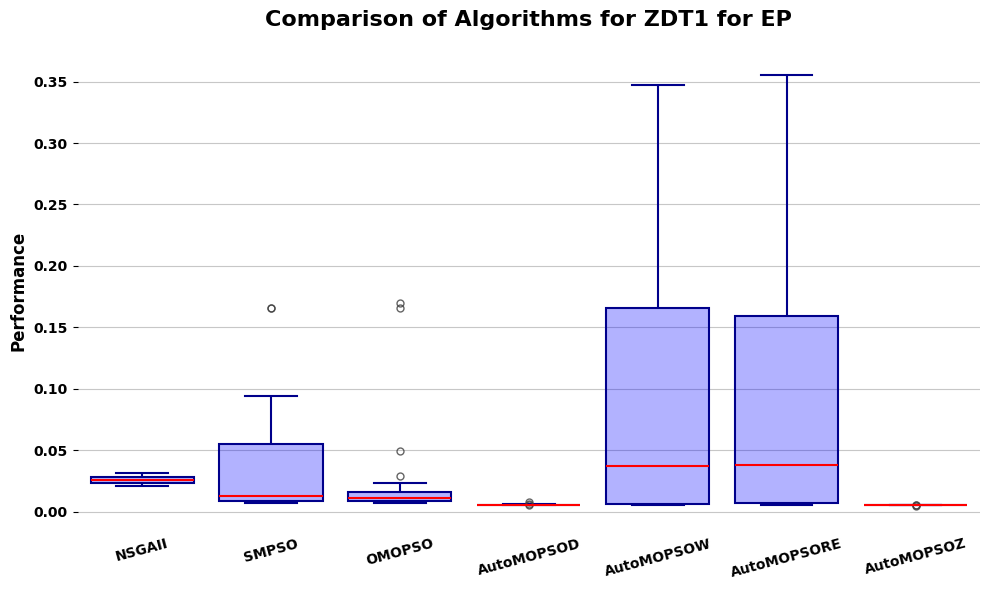

'Boxplot displayed'

In [7]:
boxplot_instance_metric(experimentData, metrics, 'EP', 'ZDT1', show=True)

In [8]:
output_dir = boxplot_all_problems(experimentData, metrics, 'EP')

[2025-01-15 07:46:11,600] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/algorithm-benchmark-toolkit/notebooks/outputs/boxplots/EP


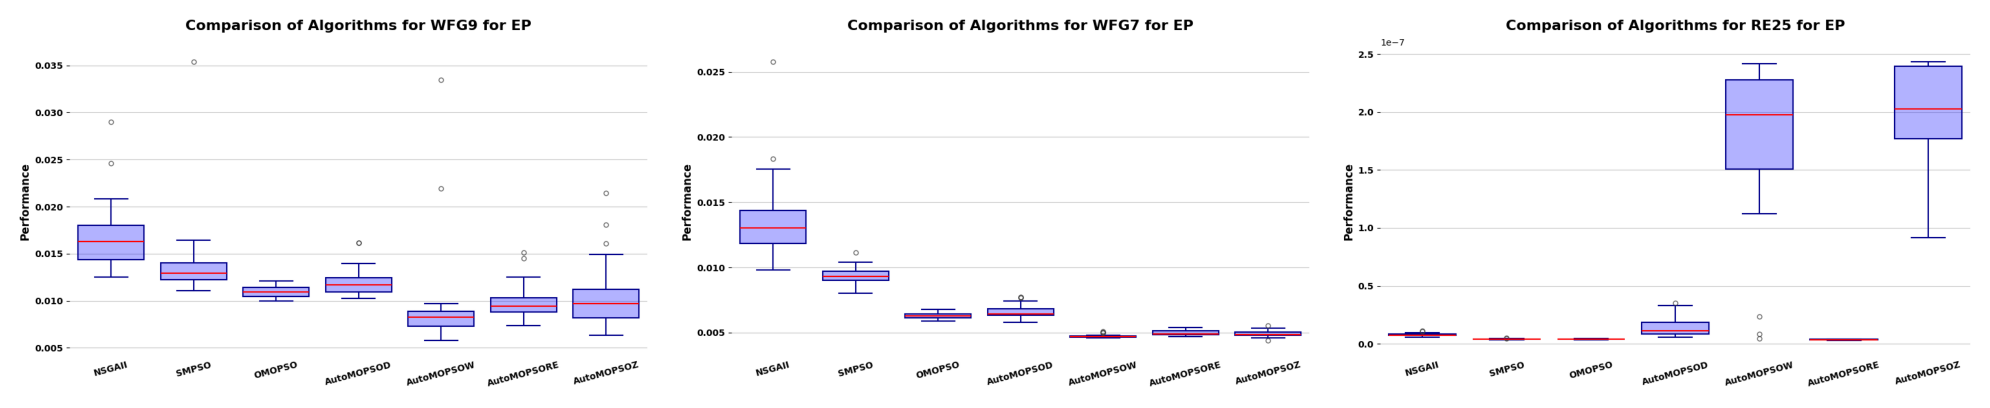

In [9]:
# Display the first 3 boxplots only
files = list(Path(output_dir).iterdir())[0:3]

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Load the images and display them
for ax, file in zip(axes, files):
    ax.imshow(Image.open(file))
    ax.axis('off')  

# Display the figure
plt.tight_layout()
plt.show()

## Critical Distance Graph

A critical distance (CD) graph is used to compare the performance of multiple algorithms statistically. It is typically generated using the Nemenyi test, which is a post-hoc test applied after a Friedman test has shown significant differences between algorithms. 

In this graph:
- Each algorithm is assigned a rank based on its performance on a metric (e.g., accuracy, hypervolume, etc.) across multiple datasets or experiments.
- The average rank of each algorithm is plotted on a horizontal axis.
- A critical distance (CD) value is calculated, representing the threshold for statistically significant differences between algorithm ranks.
- Algorithms connected by horizontal lines are statistically indistinguishable within the critical distance, meaning their performance differences are not significant at the chosen confidence level.


There are different options to generate this critical distance graphs from least specific to most specific. The least specific method (`CDplot_all_metrics`) only requires the data and metrics CSV paths and it generates critical distances graphs for all the metrics. The most specific (`CDplot_metric`) lets you choose metric to make the graph.

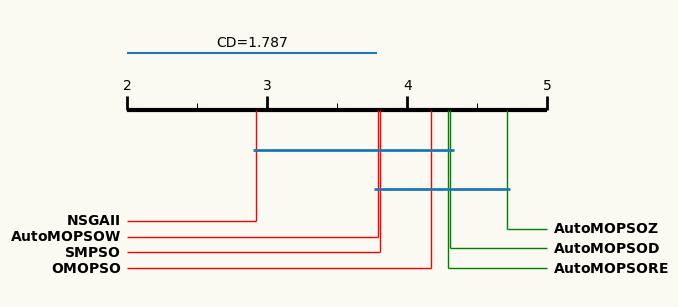

'Critical distance plot displayed'

In [10]:
CDplot_metric(experimentData, metrics, 'HV', show=True)

### Interpretation of the Provided Critical Distance Graph

This graph compares multiple multi-objective optimization algorithms (e.g., NSGAII, AutoMOPSOW, SMPSO, etc.) based on their performance in maximizing the hypervolume metric.

#### Key Observations:
1. **Critical Distance (CD):**
   - The CD is 1.787, as shown at the top of the graph. Algorithms whose ranks differ by less than 1.787 are not significantly different in performance.

2. **Ranking of Algorithms:**
   - The x-axis represents the average rank of each algorithm. Lower ranks are better, indicating better performance.
   - The red group (NSGAII, SMPSO, etc) has lower ranks, suggesting they perform better in minimizing hypervolume compared to the red group (AutoMOPSOZ, AutoMOPSOD, etc.).

3. **Critical Distance line:**
   - The key aspect of this graph are the blue critical distance lines. They connect algorithms whose distance is lower than the critical distance (CD), meaning that those connedted have a performance statistically indistinguishable. 
   - For example, in the red group we have NSGAII which is the leader in rank. However its performance is statistically indistinguishable to AutoMOPSOD from the green group because they are connected through a blue line.

#### Summary:
The critical distance graph demonstrates that:
- Within each group (red or green), the algorithms perform similarly, with no statistically significant differences.
- Algorithms from different groups connedted by the blue line are statistically indistinguishable from one another.

## LaTeX report Generation

Lastly, we offer a variety of LaTeX reports tailored for different purposes, including scientific articles and presentations (take into account that only the .tex source code is provided and you will need an external tool like overleaf to render the LaTeX code into pdf format). Below are the four types of LaTeX reports you can generate, along with a brief explanation of each:  

1. **Median Table**  
   - **Description**: Displays the median results of the experimental data in a structured tabular format.  
   - **Purpose**: Useful for summarizing central tendencies of your results and providing a quick overview.  
   - **Use Case**: Suitable for basic comparative analysis in situations where medians are the primary focus.

2. **Median Table with Friedman Test**  
   - **Description**: Extends the median table by incorporating the Friedman test results.  
   - **Purpose**: Highlights significant differences among multiple groups or algorithms, assuming a non-parametric distribution.  
   - **Use Case**: Ideal for analyzing and reporting results where ranking of methods or treatments is necessary.  

3. **Median Table with Wilcoxon Pairwise Test (Pivot-Based)**  
   - **Description**: Combines the median table with the results of Wilcoxon signed-rank pairwise tests using a pivot-based approach.  
   - **Purpose**: Provides insights into pairwise comparisons of the experimental groups relative to a designated pivot group.  
   - **Use Case**: Valuable for scenarios requiring focused comparisons against a baseline or reference algorithm.  

4. **Pairwise Wilcoxon Test Table (1-to-1 Comparison)**  
   - **Description**: Presents pairwise Wilcoxon signed-rank test results for direct 1-to-1 comparisons between groups.  
   - **Purpose**: Offers detailed insights into individual pair comparisons without the need for a pivot.  
   - **Use Case**: Suitable for comprehensive pairwise statistical analysis in experimental studies.  

There are different options to generate this tables from least specific to most specific. The least specific method (`create_latex_all_metrics`) only requires the data and metrics CSV paths and it generates all the 4 types of tables for all the different metrics. The one in the middle (`create_latex`) requires a metric to be specify and it will generate the 4 types of tables but only for the specified metric. The last one (`create_latex_selected`) lets you choose which type of table to be generated as well.

In [11]:
create_latex_selected(experimentData, metrics, "HV", "friedman")

[2025-01-15 07:46:12,322] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX friedman document for metric HV saved to /home/khaosdev/algorithm-benchmark-toolkit/notebooks/outputs/latex/HV


'/home/khaosdev/algorithm-benchmark-toolkit/notebooks/outputs/latex/HV/friedman.tex'

As it was mentioned, what is generated is the LaTeX code. You would need an external tool or have LaTeX installed in your system but if you did render it you would obtain a pdf document with (in this case) a friedman table like this:

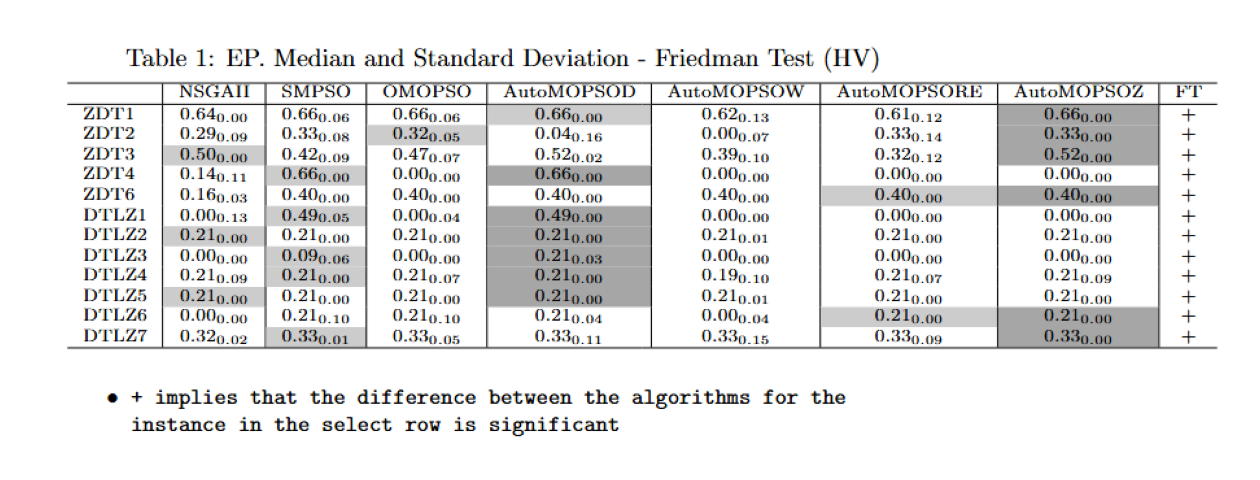

In [ ]:
img = Image.open("friedman_HV.png")
plt.figure(figsize=(16, 16))

plt.imshow(img)
plt.axis('off')  
plt.show()